# Investigação econométrica para o investimento

## Regressão investimento contra utilização da capacidade instalada.


In [1]:
# Importacao de pacotes
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa as smt
import numpy as np



In [2]:
investimento = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.2421/dados?formato=csv', sep = ';', encoding = 'utf-8', decimal = ',', index_col = 'data', parse_dates = ['data'])


In [3]:
investimento.head()

,valor
data,
1947-01-01,55.0
1948-01-01,67.0
1949-01-01,44.0
1950-01-01,39.0
1951-01-01,63.0


In [4]:
investimento = investimento.loc["2003-01-01" : "2013-01-01"]
investimento.head()

,valor
data,
2003-01-01,9894.2
2004-01-01,8338.9
2005-01-01,12549.6
2006-01-01,-9380.3
2007-01-01,27518.2


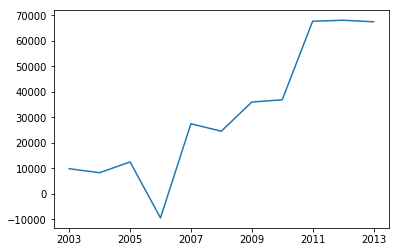

In [22]:
grafInvestimento = plt.plot(investimento)
plt.show()

In [9]:
utilização = pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.24351/dados?formato=csv', sep = ';', encoding = 'utf-8', decimal = ',', index_col = 'data', parse_dates = ['data'])

In [10]:
utilização = utilização.loc['2003-01-01' : '2013-01-01']
utilização.head()

,valor
data,
2003-01-01,79.5
2003-01-02,79.2
2003-01-03,79.8
2003-01-04,79.3
2003-01-05,80.2


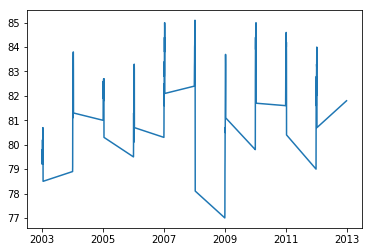

In [21]:
grafUtilização = plt.plot(utilização)
plt.show()

In [25]:
investimento.describe()


,valor
count,11.000000
mean,31795.163636
std,26627.125921
min,-9380.300000
25%,11221.900000
50%,27518.200000
75%,52204.950000
max,68093.300000


In [26]:
utilização.describe()


,valor
count,121.000000
mean,82.080992
std,1.844330
min,77.000000
25%,80.700000
50%,82.400000
75%,83.500000
max,85.100000


In [24]:
# Teste ADF - hipótese nula = raiz unitária
adf_investimento = sm.tsa.stattools.adfuller(investimento.valor)
print("Estatistica de teste:", adf_investimento[0])
print("Valores criticos para a estatistica de teste:", adf_investimento[4])
print("P-valor:", adf_investimento[1])

Estatistica de teste: 0.0
Valores criticos para a estatistica de teste: {'1%': -7.355440625, '5%': -4.474365000000001, '10%': -3.1269325}
P-valor: 0.958532086060056


/home/bruno/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Ele aparentemente não conseguiu calcular a estatística do teste

In [20]:
adf_utilização = sm.tsa.stattools.adfuller(utilização.valor)
print("Estatistica de teste:", adf_utilização[0])
print("Valores criticos para a estatistica de teste:", adf_utilização[4])
print("P-valor:", adf_utilização[1])



Estatistica de teste: -4.493801117333985
Valores criticos para a estatistica de teste: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}
P-valor: 0.0002017740852542177


O teste indica que a série é estacionária


In [28]:
# Cálculo da diferença pra tornar investimento estacionário
dif_investimento = (investimento).diff()
dif_investimento.head()


,valor
data,
2003-01-01,NaN
2004-01-01,-1555.3
2005-01-01,4210.7
2006-01-01,-21929.9
2007-01-01,36898.5


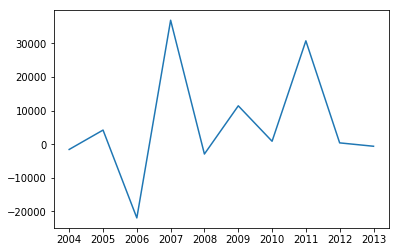

In [35]:
grafInvestimento_dif = plt.plot(dif_investimento)
plt.savefig('imagens/investimento_dif.png')
plt.show()

A variância tá variando muito, mas ele não tá deixando logaritmizar.

In [34]:
# Diferenciando a utilização
dif_utilização = (utilização).diff()
dif_utilização.head()

,valor
data,
2003-01-01,NaN
2003-01-02,-0.3
2003-01-03,0.6
2003-01-04,-0.5
2003-01-05,0.9


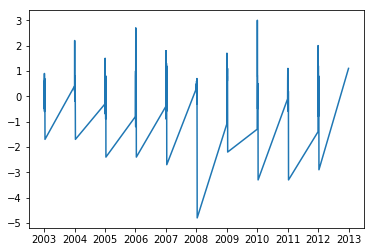

In [37]:
grafUtilização_dif = plt.plot(dif_utilização)
plt.savefig('imagens/utilização_dif.png')
plt.show()

# Regressão linear

In [42]:
# Unificação das séries
dados = reduce(lambda left,right: pd.merge(left,right, on = 'data'), [dif_investimento, dif_utilização])
# Regressão
regressao = smf.ols(formula = 'dif_investimento ~ dif_utilização - 1', data = dados,  missing = 'drop').fit()
regressao.summary()

PatsyError: Number of rows mismatch between data argument and dif_utilização (11 versus 121)
    dif_investimento ~ dif_utilização - 1
                       ^^^^^^^^^^^^^^